# Influence of 3-Point Shots in the NBA 

For this project, we'll mainly be examining how 3-point shots influence NBA games and the overall win-rate. 

In [334]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [335]:
# Importing 3 PT summary information
nba_shots = pd.read_csv('NBA3ptShootingData(13-20).csv')
nba_shots

,Teams,Year,3PM,3PA,3P%,3P% share in Total Points,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Atlanta Hawks,2013-14,9.4,25.8,36.3,27.93,NaN,NaN,NaN,NaN,NaN
1,Atlanta Hawks,2014-15,10.0,26.2,38.0,29.30,NaN,NaN,NaN,NaN,NaN
2,Atlanta Hawks,2015-16,9.9,28.4,35.0,28.90,NaN,NaN,NaN,NaN,NaN
3,Atlanta Hawks,2016-17,8.9,26.1,34.1,25.90,NaN,NaN,NaN,NaN,NaN
4,Atlanta Hawks,2017-18,11.2,31.0,36.0,32.50,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
205,New Orleans Pelicans,2015-16,8.6,23.8,36.0,25.10,NaN,NaN,NaN,NaN,NaN
206,New Orleans Pelicans,2016-17,9.4,26.8,35.0,27.00,NaN,NaN,NaN,NaN,NaN
207,New Orleans Pelicans,2017-18,10.2,28.2,36.2,27.40,NaN,NaN,NaN,NaN,NaN
208,New Orleans Pelicans,2018-19,10.3,29.9,34.4,26.80,NaN,NaN,NaN,NaN,NaN


First we have to perform some level 1 data cleaning.

In [336]:
nba_shots = nba_shots.drop(['Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10'], axis=1)
nba_shots = nba_shots.rename(columns={'Teams': 'Team'})
nba_shots

,Team,Year,3PM,3PA,3P%,3P% share in Total Points
0,Atlanta Hawks,2013-14,9.4,25.8,36.3,27.93
1,Atlanta Hawks,2014-15,10.0,26.2,38.0,29.30
2,Atlanta Hawks,2015-16,9.9,28.4,35.0,28.90
3,Atlanta Hawks,2016-17,8.9,26.1,34.1,25.90
4,Atlanta Hawks,2017-18,11.2,31.0,36.0,32.50
...,...,...,...,...,...,...
205,New Orleans Pelicans,2015-16,8.6,23.8,36.0,25.10
206,New Orleans Pelicans,2016-17,9.4,26.8,35.0,27.00
207,New Orleans Pelicans,2017-18,10.2,28.2,36.2,27.40
208,New Orleans Pelicans,2018-19,10.3,29.9,34.4,26.80


In [337]:
rename_years_dict = {'2013-14': '2014',
    '2014-15': '2015',
    '2015-16': '2016',
    '2016-17': '2017',
    '2017-18': '2018',
    '2018-19': '2019',
    '2019-20': '2020'}

nba_shots['Year'] = nba_shots['Year'].replace(rename_years_dict)
nba_shots

,Team,Year,3PM,3PA,3P%,3P% share in Total Points
0,Atlanta Hawks,2014,9.4,25.8,36.3,27.93
1,Atlanta Hawks,2015,10.0,26.2,38.0,29.30
2,Atlanta Hawks,2016,9.9,28.4,35.0,28.90
3,Atlanta Hawks,2017,8.9,26.1,34.1,25.90
4,Atlanta Hawks,2018,11.2,31.0,36.0,32.50
...,...,...,...,...,...,...
205,New Orleans Pelicans,2016,8.6,23.8,36.0,25.10
206,New Orleans Pelicans,2017,9.4,26.8,35.0,27.00
207,New Orleans Pelicans,2018,10.2,28.2,36.2,27.40
208,New Orleans Pelicans,2019,10.3,29.9,34.4,26.80


In [338]:
# Importing win percentage summary
nba_wins = pd.read_csv('win percentage.csv')
nba_wins =  nba_wins.drop(nba_wins.index[0])
nba_wins = nba_wins.rename(columns={'TEAMS': 'Team'})
nba_wins.head()

,Team,2014 Win %,2015 Win %,2016 Win %,2017 Win %,2018 Win %,2019 Win %,2020 Win %,2021 Win %,2022 Win %,2023 Win %
1,San Antonio,.756,.671,.817,.744,.573,.585,.451,.458,.415,.268
2,Oklahoma City,.720,.549,.671,.573,.585,.598,.611,.306,.293,.488
3,LA,.695,.683,.646,.622,.512,.585,.681,.653,.512,.537
4,Houston,.659,.683,.500,.671,.793,.646,.611,.236,.244,.268
5,Portland,.659,.622,.537,.500,.598,.646,.473,.583,.329,.402


In [339]:
nba_wins = nba_wins.drop(columns = [ "2021 Win %" , "2022 Win %" , "2023 Win %"])

In [340]:
# changing data frame from wide to long
melted_df = pd.melt(nba_wins, id_vars=['Team'], var_name='Year', value_name='Win %')
melted_df

,Team,Year,Win %
0,San Antonio,2014 Win %,.756
1,Oklahoma City,2014 Win %,.720
2,LA,2014 Win %,.695
3,Houston,2014 Win %,.659
4,Portland,2014 Win %,.659
...,...,...,...
205,Detroit,2020 Win %,.303
206,Boston,2020 Win %,.667
207,Orlando,2020 Win %,.452
208,Philadelphia,2020 Win %,.589


In [341]:
# Grouping by team
grouped_df = melted_df.groupby('Team')
# empty data set to later fill in the data with
win_df = pd.DataFrame(columns=['Team', 'Year', 'Win %'])
grouped_df.head()

,Team,Year,Win %
0,San Antonio,2014 Win %,.756
1,Oklahoma City,2014 Win %,.720
2,LA,2014 Win %,.695
3,Houston,2014 Win %,.659
4,Portland,2014 Win %,.659
...,...,...,...
145,Detroit,2018 Win %,.476
146,Boston,2018 Win %,.671
147,Orlando,2018 Win %,.305
148,Philadelphia,2018 Win %,.634


In [342]:
#for loop to put a specific win percentage each year in temp_df and then append it to win_df to get each team one at a time


for team, group in grouped_df:
    temp_df = pd.DataFrame({
        'Team': [team] * len(group),
        'Year': group['Year'],
        'Win %': group['Win %']
    })   
    win_df = pd.concat([win_df, temp_df])

win_df = win_df.reset_index(drop=True)
win_df

,Team,Year,Win %
0,Atlanta,2014 Win %,.463
1,Atlanta,2015 Win %,.732
2,Atlanta,2016 Win %,.585
3,Atlanta,2017 Win %,.524
4,Atlanta,2018 Win %,.293
...,...,...,...
205,Washington,2016 Win %,.500
206,Washington,2017 Win %,.598
207,Washington,2018 Win %,.524
208,Washington,2019 Win %,.390


In [343]:
win_df["Year"]= win_df["Year"].str.replace(" Win %", "")
win_df.head(10)

,Team,Year,Win %
0,Atlanta,2014,.463
1,Atlanta,2015,.732
2,Atlanta,2016,.585
3,Atlanta,2017,.524
4,Atlanta,2018,.293
5,Atlanta,2019,.354
6,Atlanta,2020,.299
7,Boston,2014,.305
8,Boston,2015,.488
9,Boston,2016,.585


In [346]:
main = win_df.sort_values(by=['Team'])
nba_teams_dict = {'Atlanta': 'Atlanta Hawks',
    'Boston': 'Boston Celtics',
    'Brooklyn': 'Brooklyn Nets',
    'Charlotte': 'Charlotte Hornets',
    'Chicago': 'Chicago Bulls',
    'Cleveland': 'Cleveland Cavaliers',
    'Dallas': 'Dallas Mavericks',
    'Denver': 'Denver Nuggets',
    'Detroit': 'Detroit Pistons',
    'Golden State': 'Golden State Warriors',
    'Houston': 'Houston Rockets',
    'Indiana': 'Indiana Pacers',
    'LA': 'Los Angeles Clippers',
    'LA Lakers': 'Los Angeles Lakers',
    'Memphis': 'Memphis Grizzlies',
    'Miami': 'Miami Heat',
    'Milwaukee': 'Milwaukee Bucks',
    'Minnesota': 'Minnesota Timberwolves',
    'New Orleans': 'New Orleans Pelicans',
    'New York': 'New York Knicks',
    'Oklahoma City': 'Oklahoma City Thunder',
    'Orlando': 'Orlando Magic',
    'Philadelphia': 'Philadelphia 76ers',
    'Phoenix': 'Phoenix Suns',
    'Portland': 'Portland Trail Blazers',
    'Sacramento': 'Sacramento Kings',
    'San Antonio': 'San Antonio Spurs',
    'Toronto': 'Toronto Raptors',
    'Utah': 'Utah Jazz',
    'Washington': 'Washington Wizards'}

main['Team'] = main['Team'].replace(nba_teams_dict)
main

,Team,Year,Win %
0,Atlanta Hawks,2014,.463
1,Atlanta Hawks,2015,.732
2,Atlanta Hawks,2016,.585
3,Atlanta Hawks,2017,.524
4,Atlanta Hawks,2018,.293
...,...,...,...
204,Washington Wizards,2015,.561
205,Washington Wizards,2016,.500
206,Washington Wizards,2017,.598
207,Washington Wizards,2018,.524


In [351]:
test = pd.merge(nba_shots, main, on=['Team','Year']) 
test['Win %'] = pd.to_numeric(test['Win %'])
test['Win %'] = test["Win %"] * 100

In [353]:
test.head()

,Team,Year,3PM,3PA,3P%,3P% share in Total Points,Win %
0,Atlanta Hawks,2014,9.4,25.8,36.3,27.93,46.3
1,Atlanta Hawks,2015,10.0,26.2,38.0,29.30,73.2
2,Atlanta Hawks,2016,9.9,28.4,35.0,28.90,58.5
3,Atlanta Hawks,2017,8.9,26.1,34.1,25.90,52.4
4,Atlanta Hawks,2018,11.2,31.0,36.0,32.50,29.3


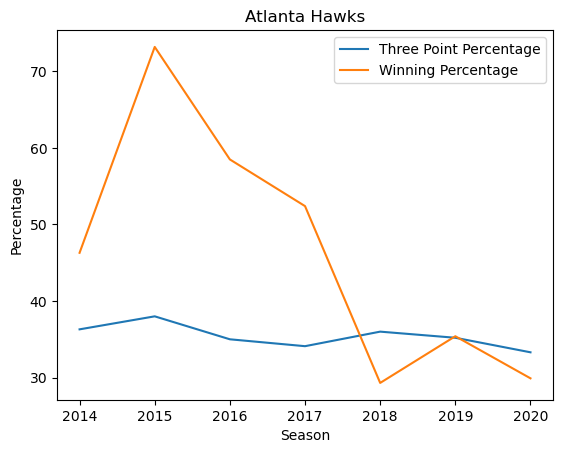

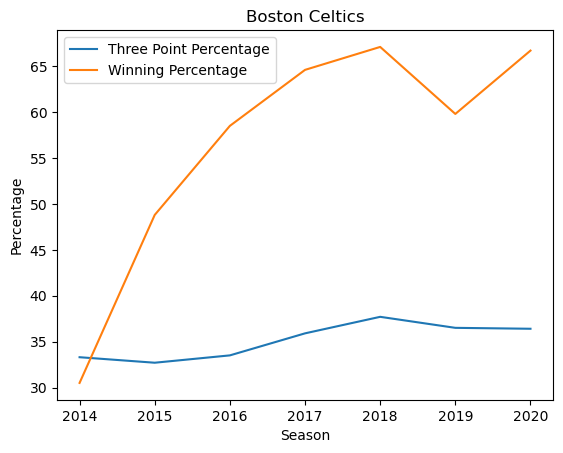

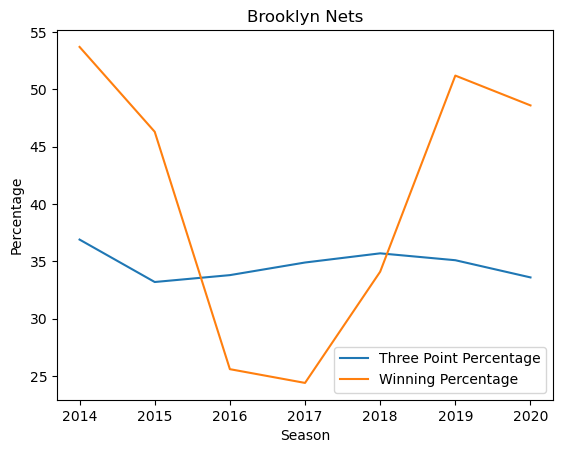

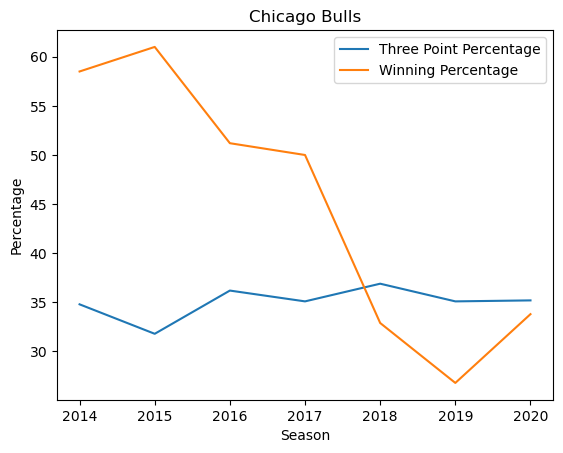

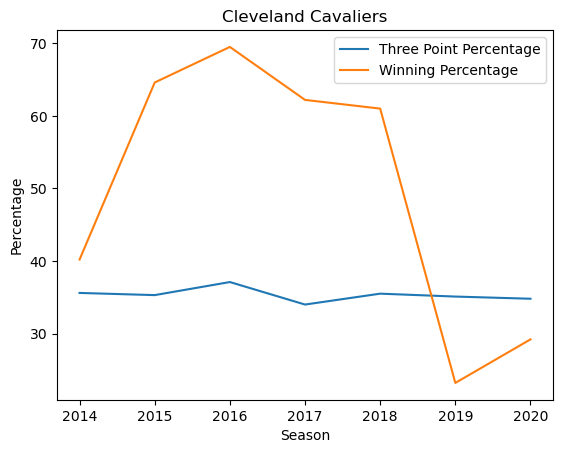

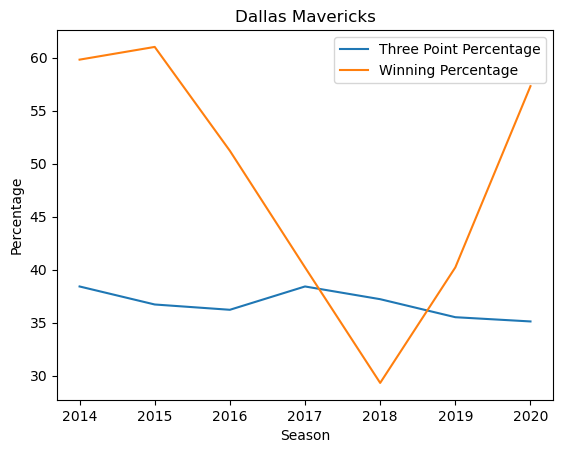

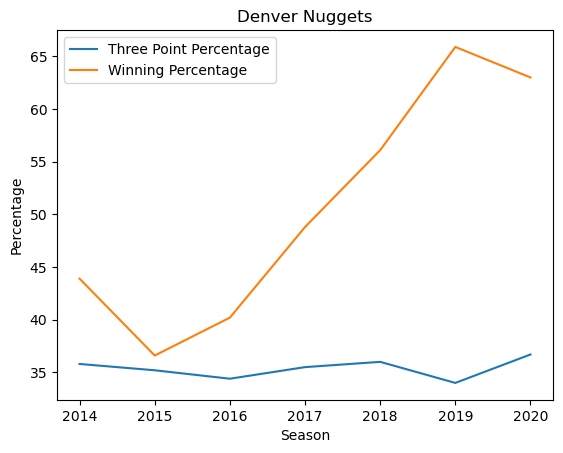

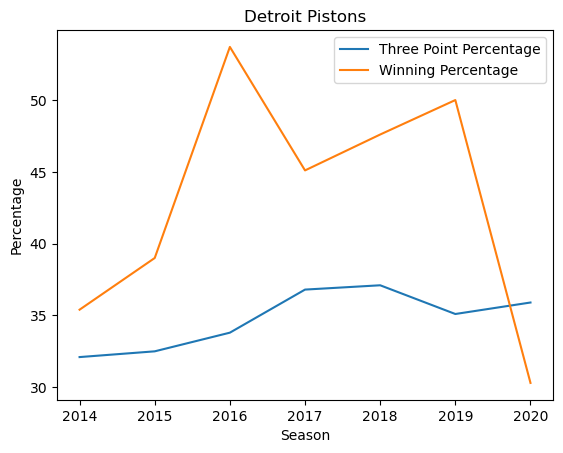

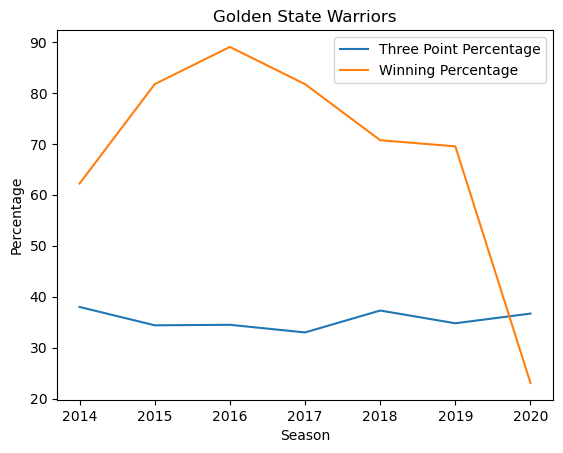

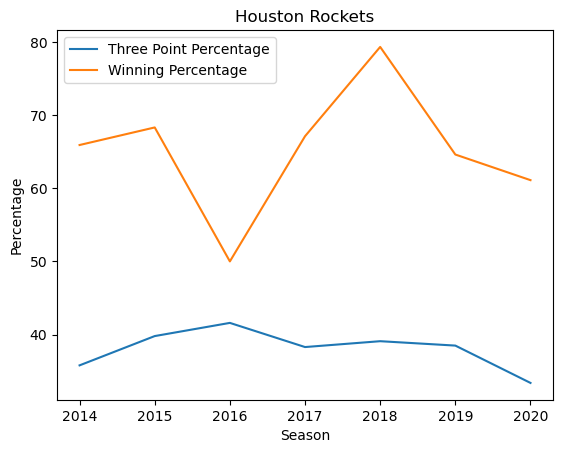

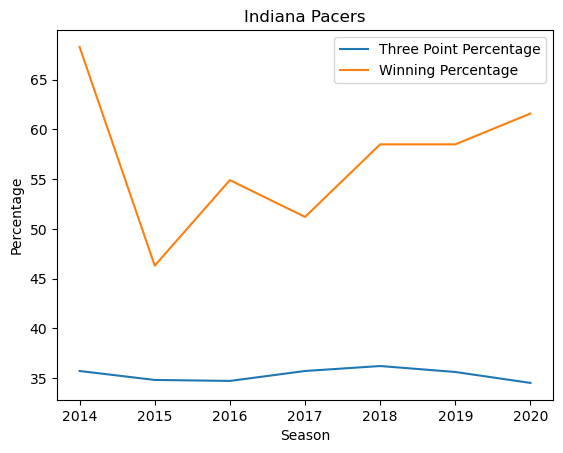

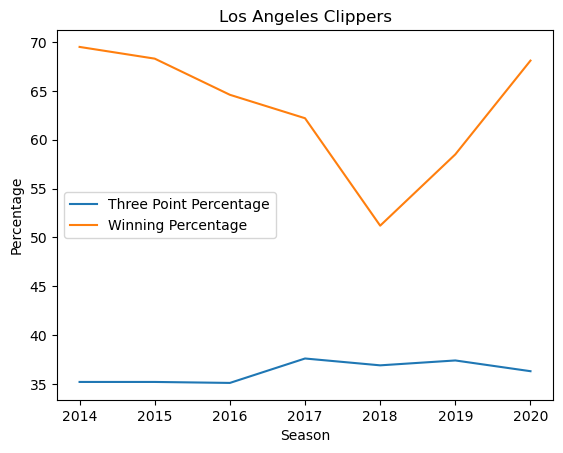

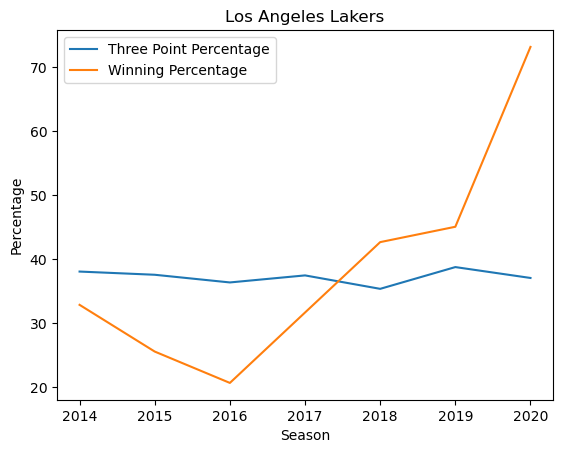

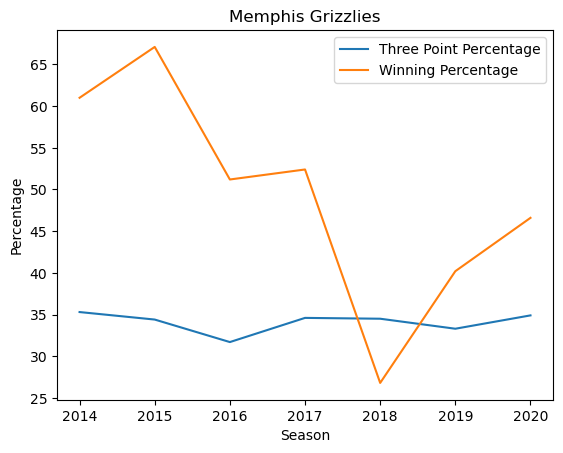

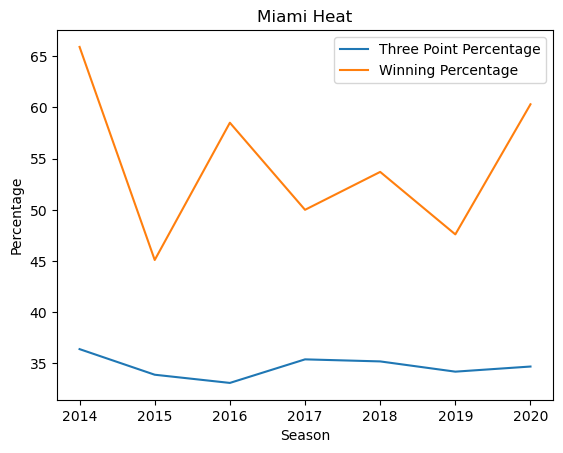

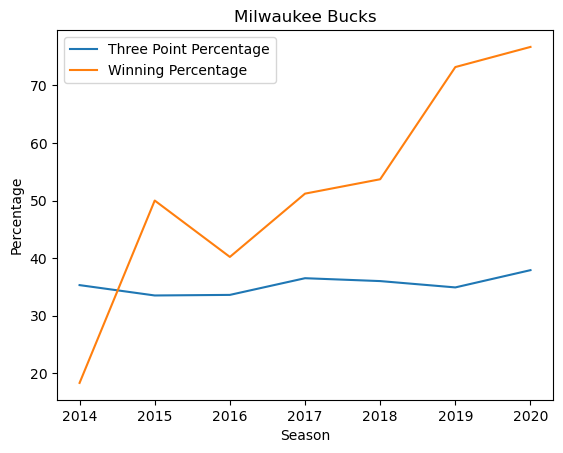

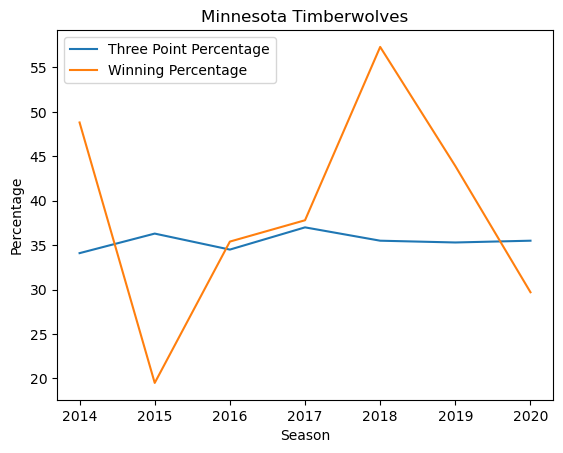

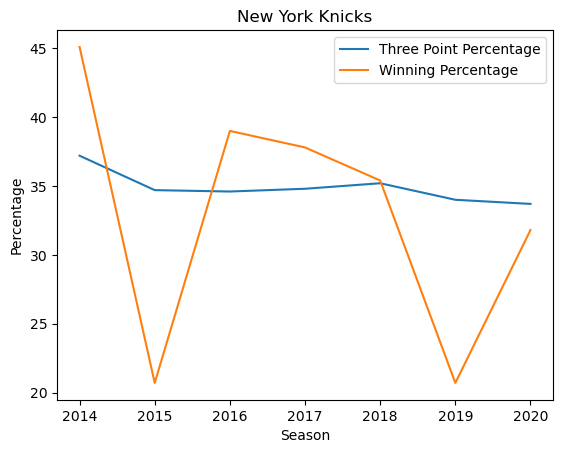

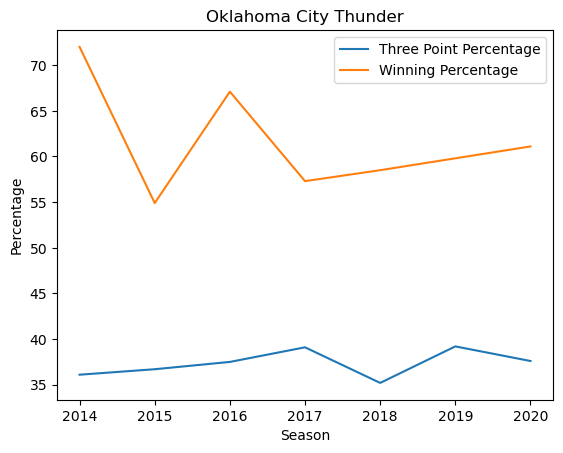

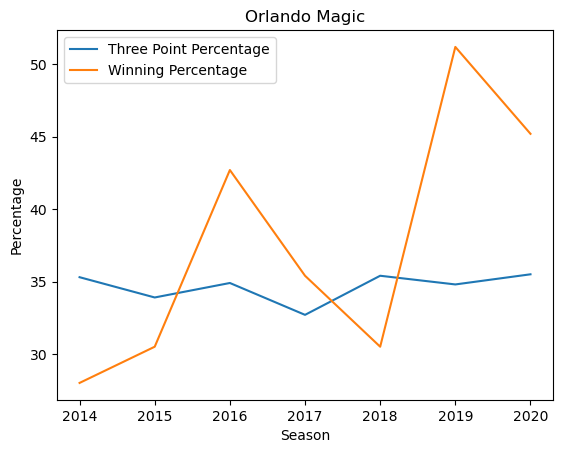

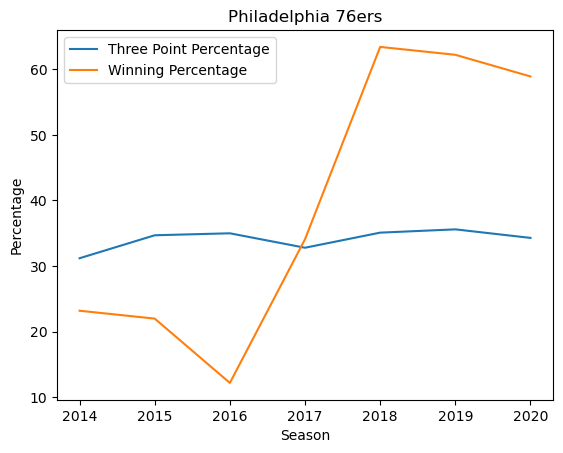

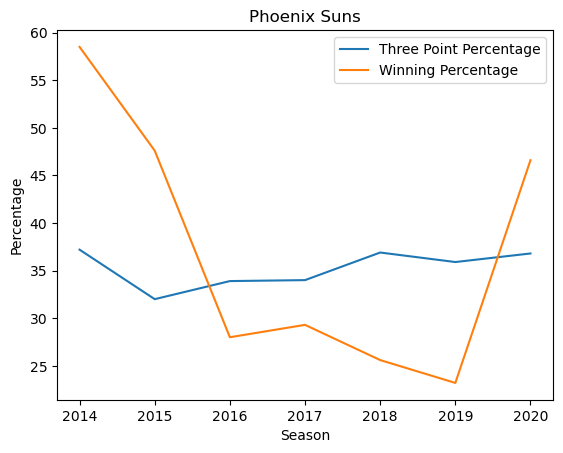

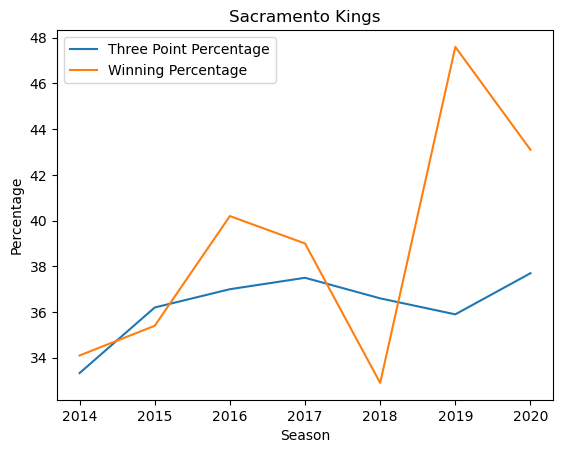

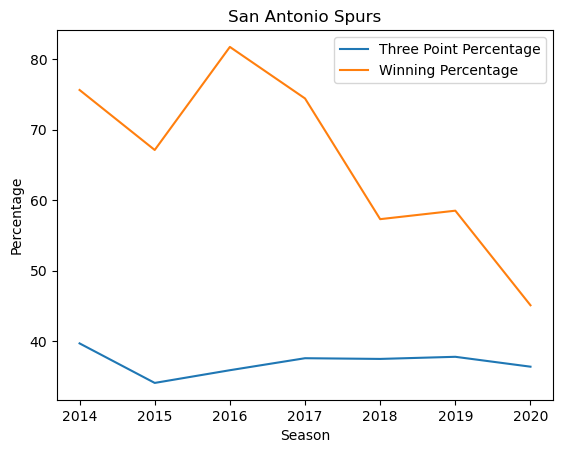

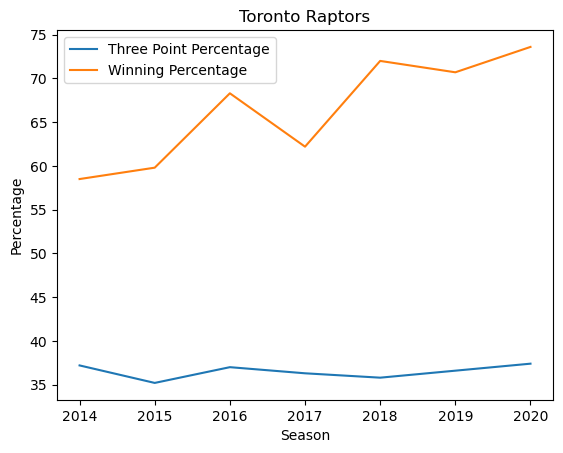

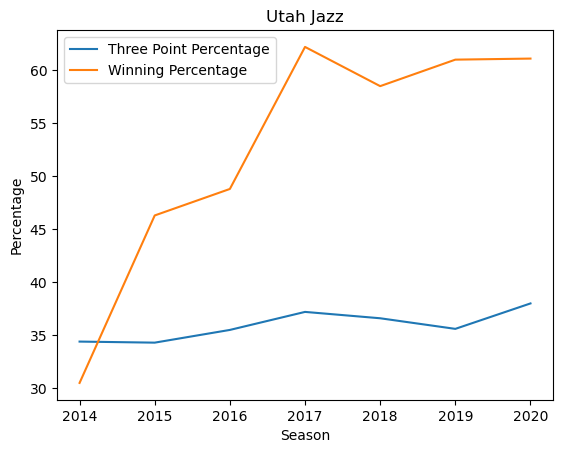

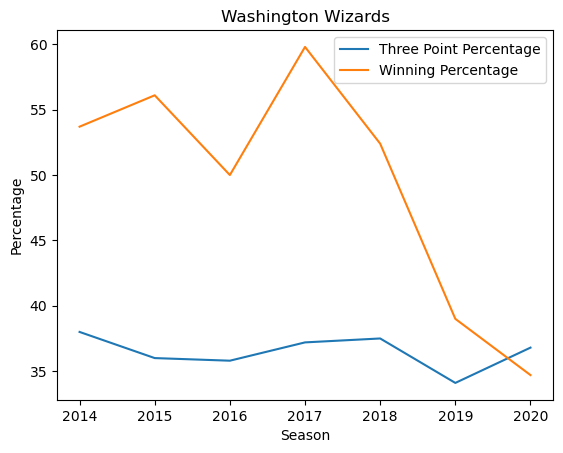

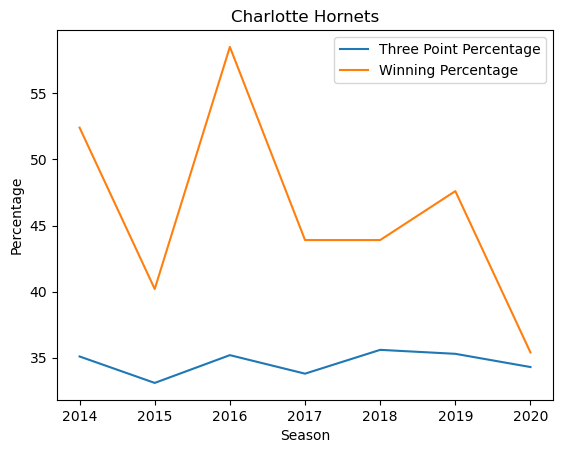

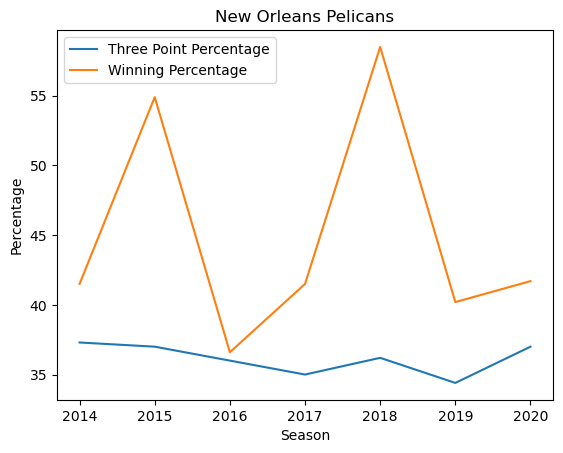

In [355]:
import pandas as pd
import matplotlib.pyplot as plt

for team in  test['Team'].unique():

    team_data = test[test['Team'] == team]


    x = team_data['Year']
    y1 = team_data['3P%']
    y2 = team_data['Win %']


    fig, ax = plt.subplots()


    ax.plot(x, y1, label='Three Point Percentage')
    ax.plot(x, y2, label='Winning Percentage')


    ax.set_title(team)
    ax.set_xlabel('Season')
    ax.set_ylabel('Percentage')


    ax.legend()


    plt.show()


In [216]:
# nba_wins = pd.read_csv('win percentage.csv')
# nba_wins =  nba_wins.drop(nba_wins.index[0])
# nba_wins = nba_wins.rename(columns={'TEAMS': 'Team'})

# #'2013-14 Win %': 'Win Pct', '2014-15 Win %': 'Win Pct',
# #'2015-16 Win %': 'Win Pct', '2016-17 Win %': 'Win Pct',
# #'2017-18 Win %': 'Win Pct', '2018-19 Win %': 'Win Pct',
# #'2019-20 Win %': 'Win Pct',})

# nba_wins = nba_wins.sort_values(by=['Team'])
# nba_teams_dict = {'Atlanta': 'Atlanta Hawks',
#     'Boston': 'Boston Celtics',
#     'Brooklyn': 'Brooklyn Nets',
#     'Charlotte': 'Charlotte Hornets',
#     'Chicago': 'Chicago Bulls',
#     'Cleveland': 'Cleveland Cavaliers',
#     'Dallas': 'Dallas Mavericks',
#     'Denver': 'Denver Nuggets',
#     'Detroit': 'Detroit Pistons',
#     'Golden State': 'Golden State Warriors',
#     'Houston': 'Houston Rockets',
#     'Indiana': 'Indiana Pacers',
#     'LA': 'Los Angeles Clippers',
#     'LA Lakers': 'Los Angeles Lakers',
#     'Memphis': 'Memphis Grizzlies',
#     'Miami': 'Miami Heat',
#     'Milwaukee': 'Milwaukee Bucks',
#     'Minnesota': 'Minnesota Timberwolves',
#     'New Orleans': 'New Orleans Pelicans',
#     'New York': 'New York Knicks',
#     'Oklahoma City': 'Oklahoma City Thunder',
#     'Orlando': 'Orlando Magic',
#     'Philadelphia': 'Philadelphia 76ers',
#     'Phoenix': 'Phoenix Suns',
#     'Portland': 'Portland Trail Blazers',
#     'Sacramento': 'Sacramento Kings',
#     'San Antonio': 'San Antonio Spurs',
#     'Toronto': 'Toronto Raptors',
#     'Utah': 'Utah Jazz',
#     'Washington': 'Washington Wizards'}

# nba_wins['Team'] = nba_wins['Team'].replace(nba_teams_dict)
# nba_wins

,Team,2014 Win %,2015 Win %,2016 Win %,2017 Win %,2018 Win %,2019 Win %,2020 Win %,2021 Win %,2022 Win %,2023 Win %
20,Atlanta Hawks,.463,.732,.585,.524,.293,.354,.299,.569,.524,.500
27,Boston Celtics,.305,.488,.585,.646,.671,.598,.667,.500,.622,.695
15,Brooklyn Nets,.537,.463,.256,.244,.341,.512,.486,.667,.537,.549
17,Charlotte Hornets,.524,.402,.585,.439,.439,.476,.354,.458,.524,.329
13,Chicago Bulls,.585,.610,.512,.500,.329,.268,.338,.431,.561,.488
24,Cleveland Cavaliers,.402,.646,.695,.622,.610,.232,.292,.306,.537,.622
10,Dallas Mavericks,.598,.610,.512,.402,.293,.402,.573,.583,.634,.463
18,Denver Nuggets,.439,.366,.402,.488,.561,.659,.630,.653,.585,.646
26,Detroit Pistons,.354,.390,.537,.451,.476,.500,.303,.278,.280,.207
6,Golden State Warriors,.622,.817,.890,.817,.707,.695,.231,.542,.646,.537


In [217]:
# nba_columns = nba_wins.columns.tolist()
# for i, col in enumerate(nba_columns):
#     print(f"Column {i}: {col}")

Column 0: Team
Column 1: 2014 Win %
Column 2: 2015 Win %
Column 3: 2016 Win %
Column 4: 2017 Win %
Column 5: 2018 Win %
Column 6: 2019 Win %
Column 7: 2020 Win %
Column 8: 2021 Win %
Column 9: 2022 Win %
Column 10: 2023 Win %


In [218]:
# start_col = 1
# end_col = 8
# selected_values = nba_wins.iloc[:, start_col:end_col].values.flatten().tolist()
# print(selected_values)

['.463', '.732', '.585', '.524', '.293', '.354', '.299', '.305', '.488', '.585', '.646', '.671', '.598', '.667', '.537', '.463', '.256', '.244', '.341', '.512', '.486', '.524', '.402', '.585', '.439', '.439', '.476', '.354', '.585', '.610', '.512', '.500', '.329', '.268', '.338', '.402', '.646', '.695', '.622', '.610', '.232', '.292', '.598', '.610', '.512', '.402', '.293', '.402', '.573', '.439', '.366', '.402', '.488', '.561', '.659', '.630', '.354', '.390', '.537', '.451', '.476', '.500', '.303', '.622', '.817', '.890', '.817', '.707', '.695', '.231', '.659', '.683', '.500', '.671', '.793', '.646', '.611', '.683', '.463', '.549', '.512', '.585', '.585', '.616', '.695', '.683', '.646', '.622', '.512', '.585', '.681', '.329', '.256', '.207', '.317', '.427', '.451', '.732', '.610', '.671', '.512', '.524', '.268', '.402', '.466', '.659', '.451', '.585', '.500', '.537', '.476', '.603', '.183', '.500', '.402', '.512', '.537', '.732', '.767', '.488', '.195', '.354', '.378', '.573', '.439',

In [219]:
# teams_list = ['Atlanta Hawks', 'Boston Celtics', 'Brooklyn Nets', 'Charlotte Hornets', 'Chicago Bulls', 'Cleveland Cavaliers',
#               'Dallas Mavericks', 'Denver Nuggets', 'Detroit Pistons', 'Golden State Warriors', 'Houston Rockets',
#               'Indiana Pacers', 'Los Angeles Clippers', 'Los Angeles Lakers', 'Memphis Grizzlies', 'Miami Heat',
#               'Milwaukee Bucks', 'Minnesota Timberwolves', 'New Orleans Pelicans', 'New York Knicks',
#               'Oklahoma City Thunder', 'Orlando Magic', 'Philadelphia 76ers', 'Phoenix Suns', 'Portland Trail Blazers',
#               'Sacramento Kings', 'San Antonio Spurs', 'Toronto Raptors', 'Utah Jazz', 'Washington Wizards']

# years_list = ['2013-14', '2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20']

# # Create a new dataframe with team names appearing 7 times each
# nba_df = pd.DataFrame({'Team': np.repeat(teams_list, 7)})
# nba_df.insert(loc=1, column='Year', value=np.repeat(years_list, 30)) #7 seasons by 30 = 210 to match column
# nba_df['index'] = nba_df.groupby('Team').cumcount()
# nba_df['Year'] = nba_df['index'] + int(nba_df['Year'].iloc[0][:4]) 
# nba_df['Year'] = nba_df['Year'].astype(str) + '-' + nba_df['Year'].add(1).astype(str).str[2:4] # shift year by 1 and convert to string
# nba_df.drop(columns=['index'], inplace=True)
# nba_df

,Team,Year
0,Atlanta Hawks,2013-14
1,Atlanta Hawks,2014-15
2,Atlanta Hawks,2015-16
3,Atlanta Hawks,2016-17
4,Atlanta Hawks,2017-18
...,...,...
205,Washington Wizards,2015-16
206,Washington Wizards,2016-17
207,Washington Wizards,2017-18
208,Washington Wizards,2018-19


In [220]:
counts = nba_df['Team'].value_counts()
print(counts)

Atlanta Hawks             7
Boston Celtics            7
Utah Jazz                 7
Toronto Raptors           7
San Antonio Spurs         7
Sacramento Kings          7
Portland Trail Blazers    7
Phoenix Suns              7
Philadelphia 76ers        7
Orlando Magic             7
Oklahoma City Thunder     7
New York Knicks           7
New Orleans Pelicans      7
Minnesota Timberwolves    7
Milwaukee Bucks           7
Miami Heat                7
Memphis Grizzlies         7
Los Angeles Lakers        7
Los Angeles Clippers      7
Indiana Pacers            7
Houston Rockets           7
Golden State Warriors     7
Detroit Pistons           7
Denver Nuggets            7
Dallas Mavericks          7
Cleveland Cavaliers       7
Chicago Bulls             7
Charlotte Hornets         7
Brooklyn Nets             7
Washington Wizards        7
Name: Team, dtype: int64


In [221]:

teams_list = ['Atlanta Hawks', 'Boston Celtics', 'Brooklyn Nets', 'Charlotte Hornets', 'Chicago Bulls', 'Cleveland Cavaliers',
              'Dallas Mavericks', 'Denver Nuggets', 'Detroit Pistons', 'Golden State Warriors', 'Houston Rockets',
              'Indiana Pacers', 'Los Angeles Clippers', 'Los Angeles Lakers', 'Memphis Grizzlies', 'Miami Heat',
              'Milwaukee Bucks', 'Minnesota Timberwolves', 'New Orleans Pelicans', 'New York Knicks',
              'Oklahoma City Thunder', 'Orlando Magic', 'Philadelphia 76ers', 'Phoenix Suns', 'Portland Trail Blazers',
              'Sacramento Kings', 'San Antonio Spurs', 'Toronto Raptors', 'Utah Jazz', 'Washington Wizards']

win_pcts = pd.DataFrame({'Team': np.repeat(teams_list, 7)})
win_pcts.insert(loc=1, column='Year', value=np.repeat(years_list, 30)) #7 seasons by 30 = 210 to match column
win_pcts ['index'] = win_pcts.groupby('Team').cumcount()

win_pcts['Year'] = win_pcts['index'] + int(win_pcts['Year'].iloc[0][:4]) 
win_pcts['Year'] = win_pcts['Year'].astype(str) + '-' + win_pcts['Year'].add(1).astype(str).str[2:4]

#win_pcts['Win Pct'] = ['0.463', '0.732', '0.585', '0.524', '0.293', '0.354', '0.299', '0.305', '0.488', '0.585', '0.646', '0.671', '0.598', '0.667', '0.537', '0.463', '0.256', '0.244', '0.341', '0.512', '0.486', '0.524', '0.402', '0.585', '0.439', '0.439', '0.476', '0.354', '0.585', '0.61', '0.512', '0.5', '0.329', '0.268', '0.338', '0.402', '0.646', '0.695', '0.622', '0.61', '0.232', '0.292', '0.598', '0.61', '0.512', '0.402', '0.293', '0.402', '0.573', '0.439', '0.366', '0.402', '0.488', '0.561', '0.659', '0.63', '0.354', '0.39', '0.537', '0.451', '0.476', '0.5', '0.303', '0.622', '0.817', '0.89', '0.817', '0.707', '0.695', '0.231', '0.659', '0.683', '0.5', '0.671', '0.793', '0.646', '0.611', '0.683', '0.463', '0.549', '0.512', '0.585', '0.585', '0.616', '0.695', '0.683', '0.646', '0.622', '0.512', '0.585', '0.681', '0.329', '0.256', '0.207', '0.317', '0.427', '0.451', '0.732', '0.61', '0.671', '0.512', '0.524', '0.268', '0.402', '0.466', '0.659', '0.451', '0.585', '0.5', '0.537', '0.476', '0.603', '0.183', '0.5', '0.402', '0.512', '0.537', '0.732', '0.767', '0.488', '0.195', '0.354', '0.378', '0.573', '0.439', '0.297', '0.415', '0.549', '0.366', '0.415', '0.585', '0.402', '0.417', '0.451', '0.207', '0.39', '0.378', '0.354', '0.207', '0.318', '0.72', '0.549', '0.671', '0.573', '0.585', '0.598', '0.611', '0.28', '0.305', '0.427', '0.354', '0.305', '0.512', '0.452', '0.232', '0.22', '0.122', '0.341', '0.634', '0.622', '0.589', '0.585', '0.476', '0.28', '0.293', '0.256', '0.232', '0.466', '0.659', '0.622', '0.537', '0.5', '0.598', '0.646', '0.473', '0.341', '0.354', '0.402', '0.39', '0.329', '0.476', '0.431', '0.756', '0.671', '0.817', '0.744', '0.573', '0.585', '0.451', '0.585', '0.598', '0.683', '0.622', '0.72', '0.707', '0.736', '0.305', '0.463', '0.488', '0.622', '0.585', '0.61', '0.611', '0.537', '0.561', '0.5', '0.598', '0.524', '0.39', '0.347']
win_pcts = win_pcts.drop(columns=['index'])
win_pcts

,Team,Year
0,Atlanta Hawks,2013-14
1,Atlanta Hawks,2014-15
2,Atlanta Hawks,2015-16
3,Atlanta Hawks,2016-17
4,Atlanta Hawks,2017-18
...,...,...
205,Washington Wizards,2015-16
206,Washington Wizards,2016-17
207,Washington Wizards,2017-18
208,Washington Wizards,2018-19


    Now we can merge the dataframes together.

In [222]:
test = pd.merge(nba_shots, win_pcts, on= 'Year') 
test.drop(columns=['Team_y'], inplace=True)
test = test.rename(columns={'Team_x': 'Team'})

fixed_merge = test.groupby(['Team', 'Year']).first().reset_index()
fixed_merge

,Team,Year,3PM,3PA,3P%,3P% share in Total Points
0,Atlanta Hawks,2013-14,9.4,25.8,36.3,27.93
1,Atlanta Hawks,2014-15,10.0,26.2,38.0,29.30
2,Atlanta Hawks,2015-16,9.9,28.4,35.0,28.90
3,Atlanta Hawks,2016-17,8.9,26.1,34.1,25.90
4,Atlanta Hawks,2017-18,11.2,31.0,36.0,32.50
...,...,...,...,...,...,...
205,Washington Wizards,2015-16,8.6,24.2,35.8,24.80
206,Washington Wizards,2016-17,9.2,24.8,37.2,25.30
207,Washington Wizards,2017-18,9.9,26.5,37.5,27.90
208,Washington Wizards,2018-19,11.3,33.3,34.1,29.70


In [223]:
counts = fixed_merge['Team'].value_counts()
print(counts)

Atlanta Hawks             7
Boston Celtics            7
Utah Jazz                 7
Toronto Raptors           7
San Antonio Spurs         7
Sacramento Kings          7
Portland Trailblazers     7
Phoenix Suns              7
Philadelphia 76ers        7
Orlando Magic             7
Oklahoma City Thunder     7
New York Knicks           7
New Orleans Pelicans      7
Minnesota Timberwolves    7
Milwaukee Bucks           7
Miami Heat                7
Memphis Grizzlies         7
Los Angeles Lakers        7
Los Angeles Clippers      7
Indiana Pacers            7
Houston Rockets           7
Golden State Warriors     7
Detroit Pistons           7
Denver Nuggets            7
Dallas Mavericks          7
Cleveland Cavaliers       7
Chicago Bulls             7
Charlotte Hornets         7
Brooklyn Nets             7
Washington Wizards        7
Name: Team, dtype: int64


    Here are some visualizations we can create with this data

In [224]:
#fixed_merge
fixed_merge['3P%'] = pd.to_numeric(fixed_merge['3P%'])
#fixed_merge =fixed_merge['3PA'] = pd.to_numeric( fixed_merge['3PA'])
#fixed_mergedf =fixed_merge['3PM'] = pd.to_numeric( fixed_merge['3PM'])
#fixed_mergedf =fixed_merge['3P% share in Total Points'] = pd.to_numeric( fixed_merge['3P% share in Total Points'])
#fixed_merge =fixed_merge['Win Pct'] = pd.to_numeric( fixed_merge['Win Pct'])

In [225]:
fixed_merge['Win Pct'] = pd.to_numeric( fixed_merge['Win Pct'])


KeyError: 'Win Pct'

In [ ]:
fixed_merge['Win Pct'] = fixed_merge ["Win Pct"] * 100

In [ ]:
fixed_merge["Win Pct"].head()

0    46.3
1    73.2
2    58.5
3    52.4
4    29.3
Name: Win Pct, dtype: float64

In [ ]:
fixed_merge


,Team,Year,3PM,3PA,3P%,3P% share in Total Points,Win Pct
0,Atlanta Hawks,2013-14,9.4,25.8,36.3,27.93,0.463
1,Atlanta Hawks,2014-15,10.0,26.2,38.0,29.30,0.732
2,Atlanta Hawks,2015-16,9.9,28.4,35.0,28.90,0.585
3,Atlanta Hawks,2016-17,8.9,26.1,34.1,25.90,0.524
4,Atlanta Hawks,2017-18,11.2,31.0,36.0,32.50,0.293
...,...,...,...,...,...,...,...
205,Washington Wizards,2015-16,8.6,24.2,35.8,24.80,0.585
206,Washington Wizards,2016-17,9.2,24.8,37.2,25.30,0.524
207,Washington Wizards,2017-18,9.9,26.5,37.5,27.90,0.293
208,Washington Wizards,2018-19,11.3,33.3,34.1,29.70,0.354


In [ ]:
for team in  fixed_merge['Team'].unique():

    team_data = fixed_merge[fixed_merge['Team'] == team]


    x = team_data['Year']
    y1 = team_data['3P%']
    y2 = team_data['Win Pct']


    fig, ax = plt.subplots()


    ax.plot(x, y1, label='Three Point Percentage')
    ax.plot(x, y2, label='Winning Percentage')


    ax.set_title(team)
    ax.set_xlabel('Season')
    ax.set_ylabel('Percentage')


    ax.legend()


    plt.show()


AttributeError: module 'matplotlib' has no attribute 'subplots'

In [ ]:



#plt.plot(fixed_merge['Year'], fixed_merge['3PM'])

#fixed_merge.set_index(['Year'], inplace=True)
#plt.plot(fixed_merge['Year'],fixed_merge['3P%'])
#fixed_merge.groupby('Team')['3P%'].plot(legend=True)
#fixed_merge.plot.line(x='Team', y=['3P%'])
#fixed_merge.plot()
#fixed_merge.plot(x="Team"=='Los Angeles Lakers', y=["3PM"], kind="bar", figsize=(100, 30))


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

fixed_merge.head(50)

,Team,Year,3PM,3PA,3P%,3P% share in Total Points,Win Pct
0,Atlanta Hawks,2013-14,9.4,25.8,36.3,27.93,0.463
1,Atlanta Hawks,2014-15,10.0,26.2,38.0,29.30,0.732
2,Atlanta Hawks,2015-16,9.9,28.4,35.0,28.90,0.585
3,Atlanta Hawks,2016-17,8.9,26.1,34.1,25.90,0.524
4,Atlanta Hawks,2017-18,11.2,31.0,36.0,32.50,0.293
5,Atlanta Hawks,2018-19,13.0,37.0,35.2,34.40,0.354
6,Atlanta Hawks,2019-20,12.0,36.1,33.3,32.20,0.299
7,Boston Celtics,2013-14,7.0,21.1,33.3,21.82,0.463
8,Boston Celtics,2014-15,8.0,24.6,32.7,23.70,0.732
9,Boston Celtics,2015-16,8.7,26.1,33.5,24.70,0.585


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

temp = fixed_merge.filter(["Team", "Year", "3P%", "Win Pct"])

team_names = fixed_merge['Team'].unique()

bc = fixed_merge[fixed_merge['Team'] == 'Washington Wizards'] 
bc
# fig, ax = plt.subplots()


# ax.plot(bc['Year'], bc['Win Pct'], label='Winning Percentage')
# ax.plot(bc['Year'], bc['3P%'], label='Three-Point Percentage')
    
# # ax.set_title(f'{team} Results')
# ax.set_xlabel('Year')
# ax.set_ylabel('Percentage')


# ax.legend()


# plt.show()

    
# for team in team_names:
#     df = fixed_merge[fixed_merge['Team'] == team] 
    
#     fig, ax = plt.subplots()


#     ax.plot(df['Year'], df['Win Pct'], label='Winning Percentage')
#     ax.plot(df['Year'], df['3P%'], label='Three-Point Percentage')
    
#     ax.set_title(f'{team} Results')
#     ax.set_xlabel('Year')
#     ax.set_ylabel('Percentage')


#     ax.legend()


#     plt.show()

#     fig, ax = plt.subplots()


#     ax.plot(group['Year'], group['Win Pct'], label='Winning Percentage')
#     ax.plot(group['Year'], group['3P%'], label='Three-Point Percentage')


#     ax.set_title(f'{team} Results')
#     ax.set_xlabel('Year')
#     ax.set_ylabel('Percentage')


#     ax.legend()


#     plt.show()


,Team,Year,3PM,3PA,3P%,3P% share in Total Points,Win Pct
203,Washington Wizards,2013-14,7.9,20.8,38.0,23.53,0.463
204,Washington Wizards,2014-15,6.1,16.8,36.0,18.60,0.732
205,Washington Wizards,2015-16,8.6,24.2,35.8,24.80,0.585
206,Washington Wizards,2016-17,9.2,24.8,37.2,25.30,0.524
207,Washington Wizards,2017-18,9.9,26.5,37.5,27.90,0.293
208,Washington Wizards,2018-19,11.3,33.3,34.1,29.70,0.354
209,Washington Wizards,2019-20,12.0,32.6,36.8,31.50,0.299


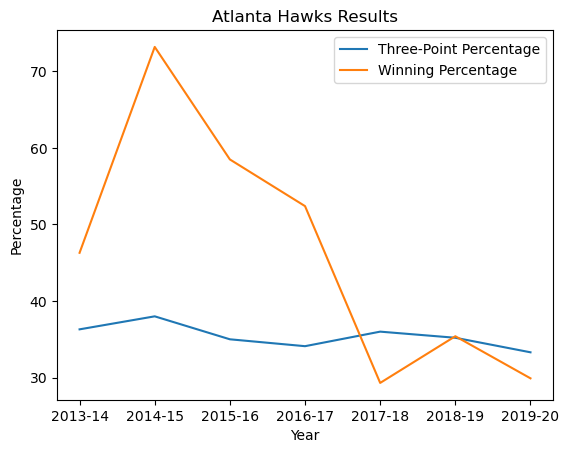

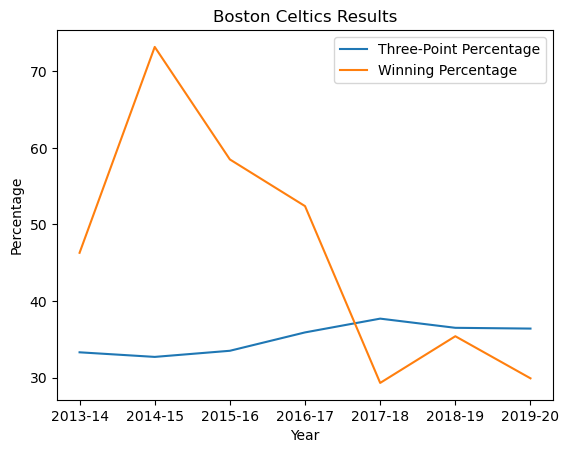

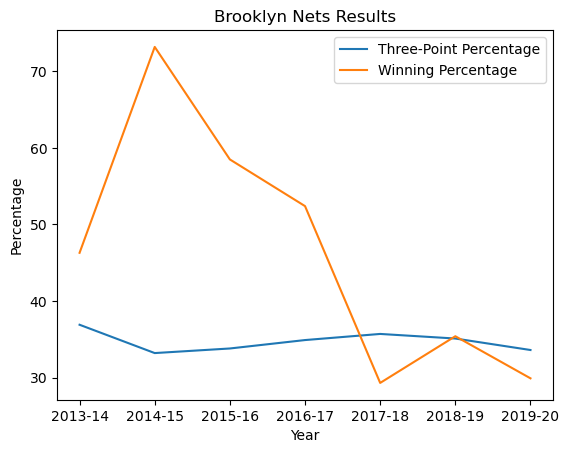

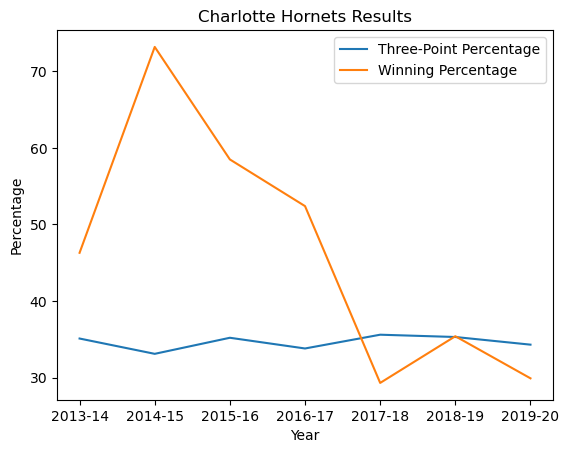

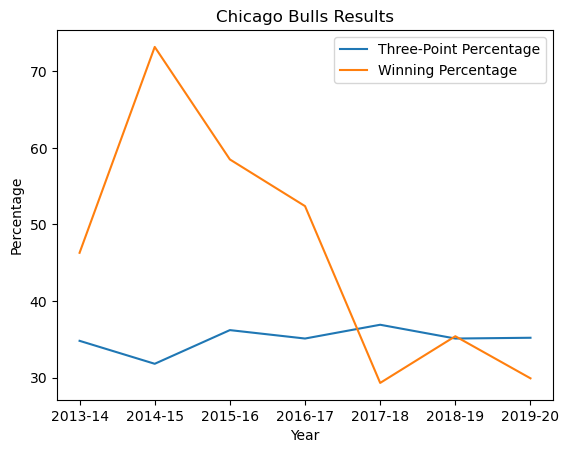

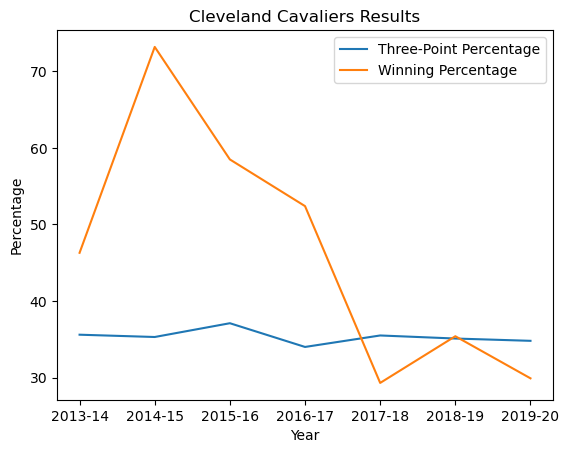

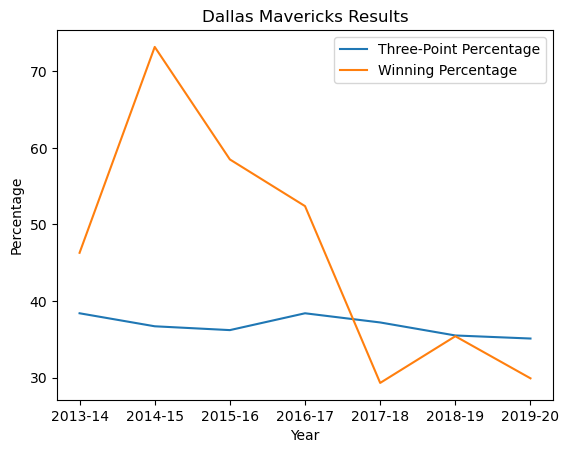

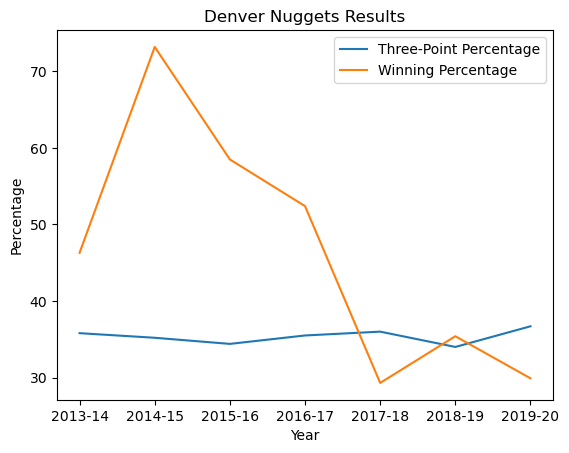

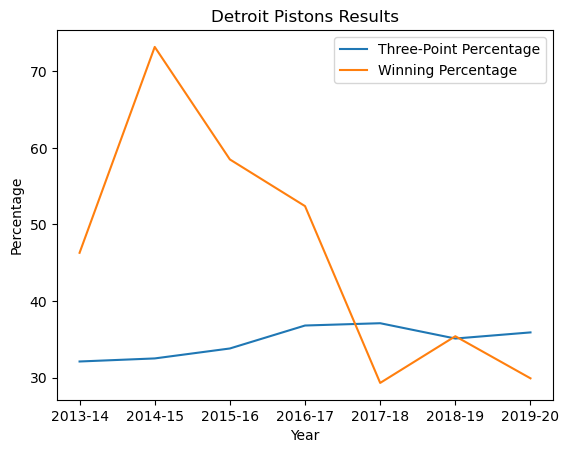

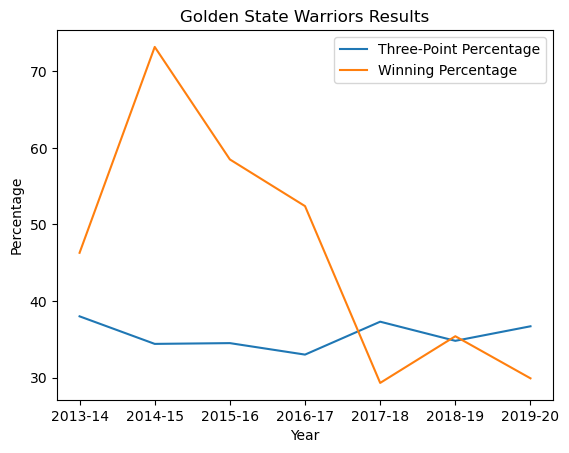

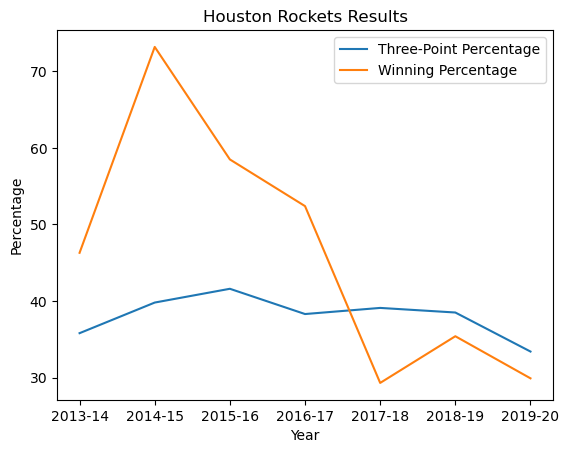

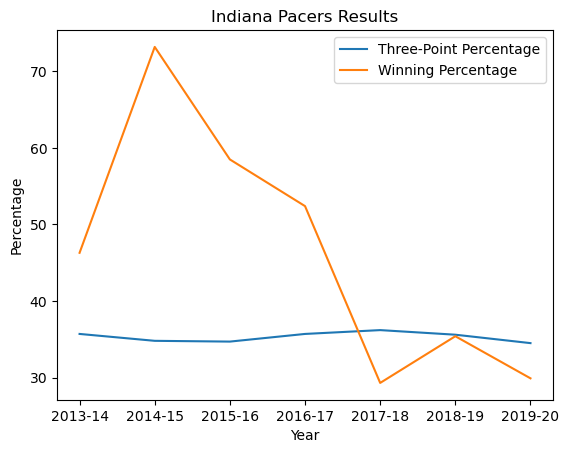

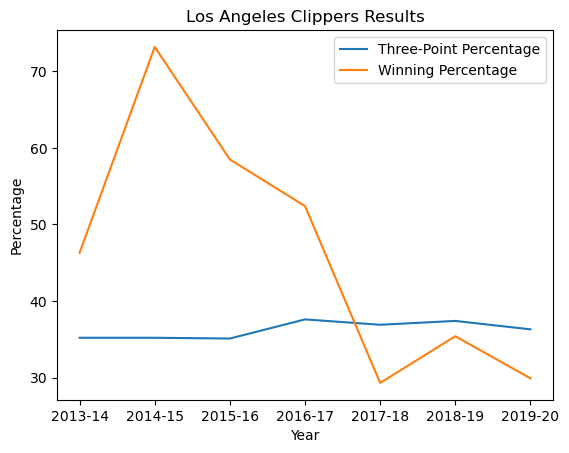

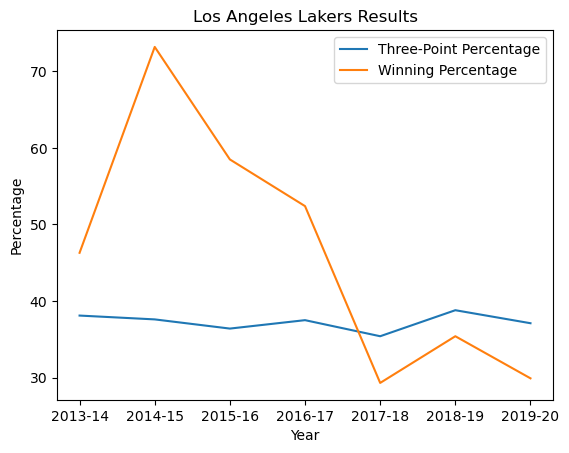

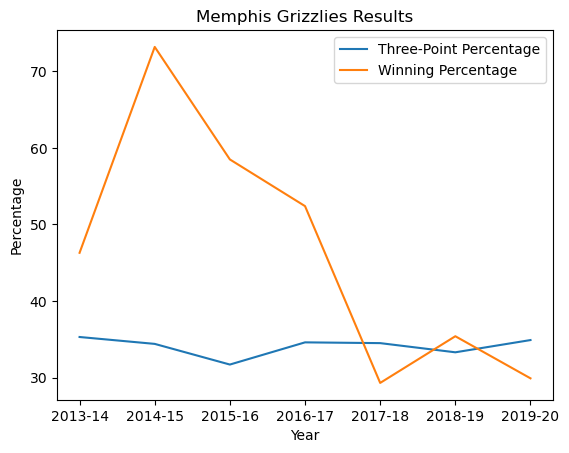

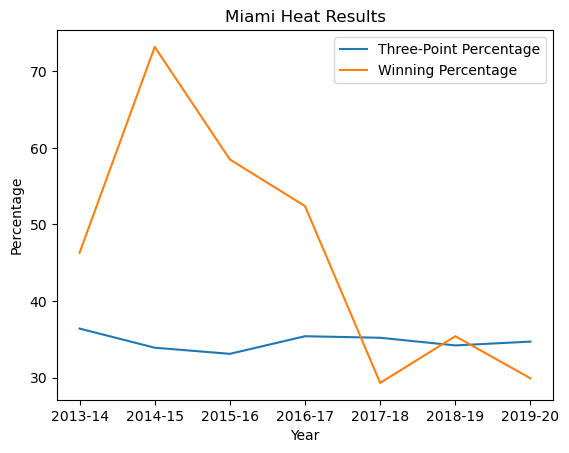

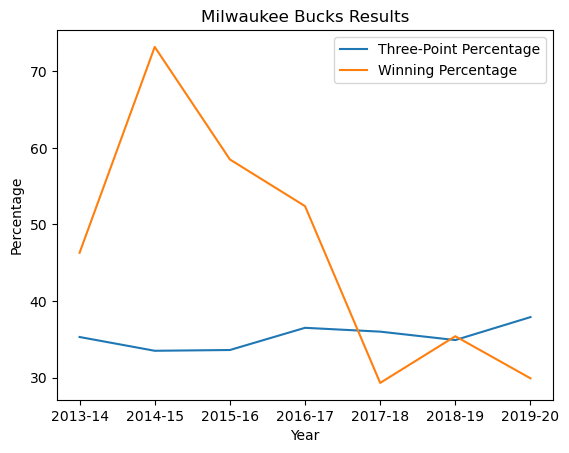

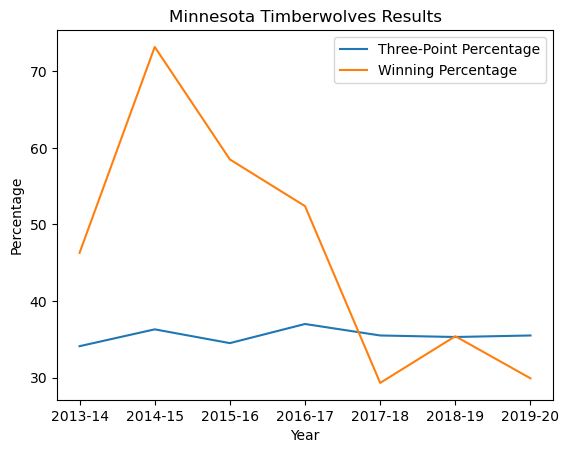

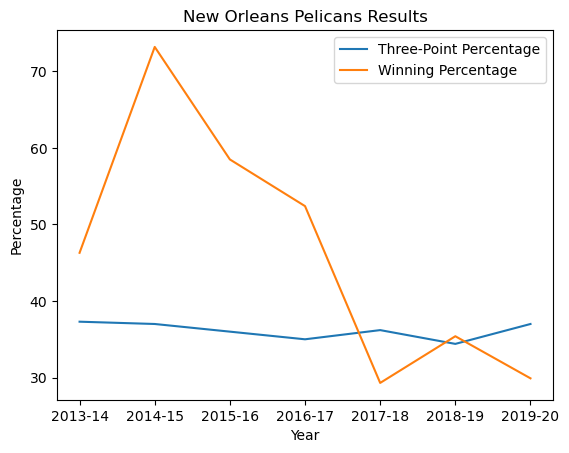

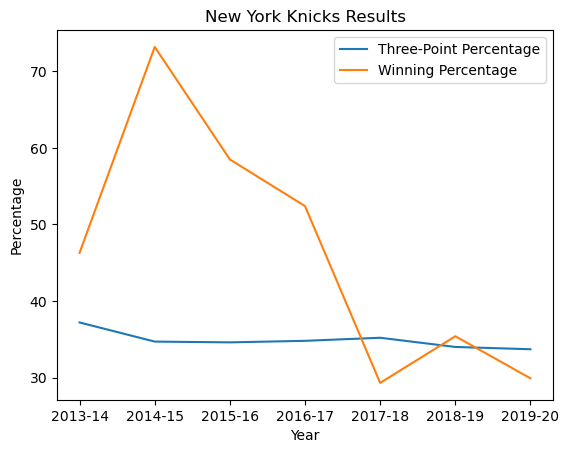

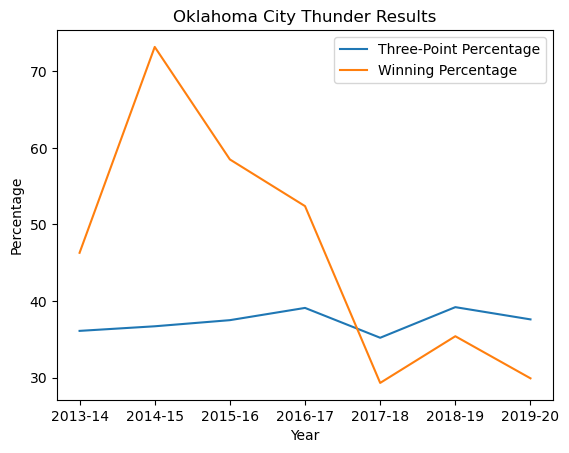

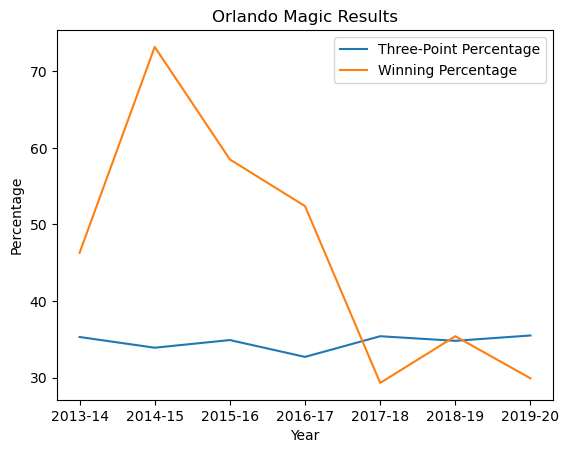

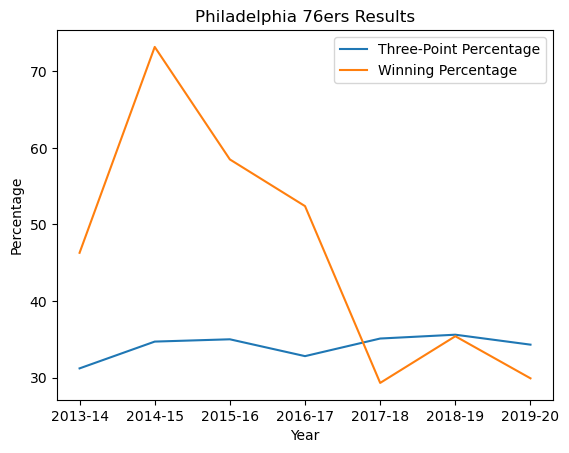

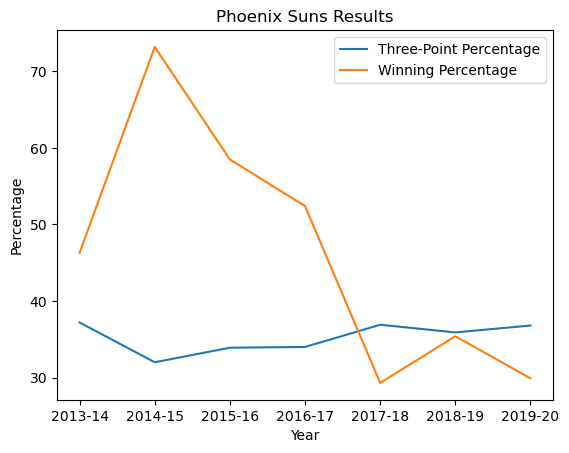

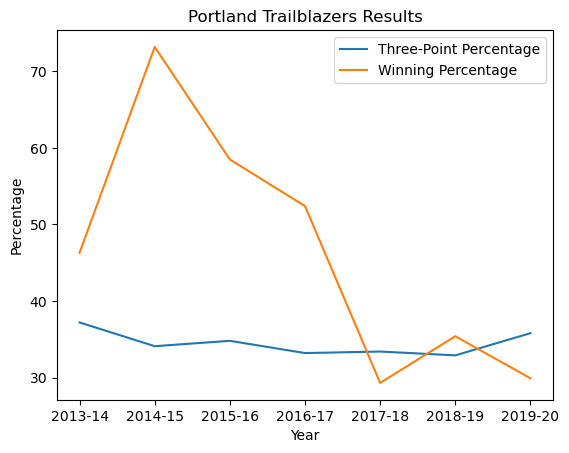

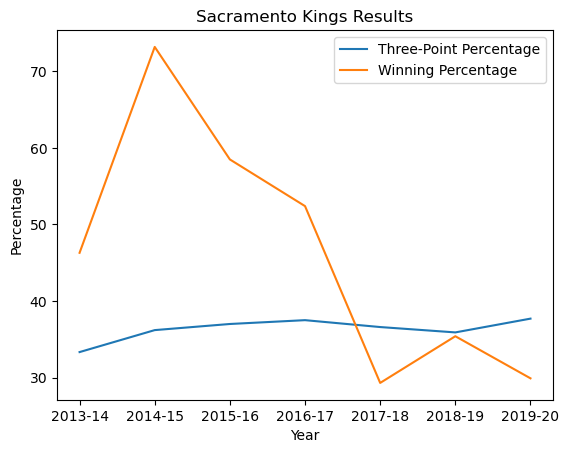

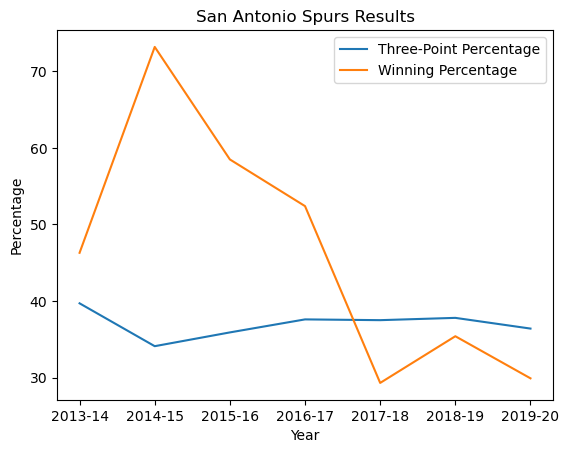

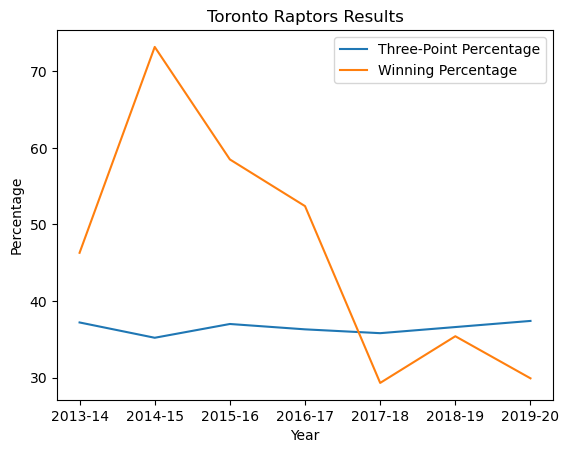

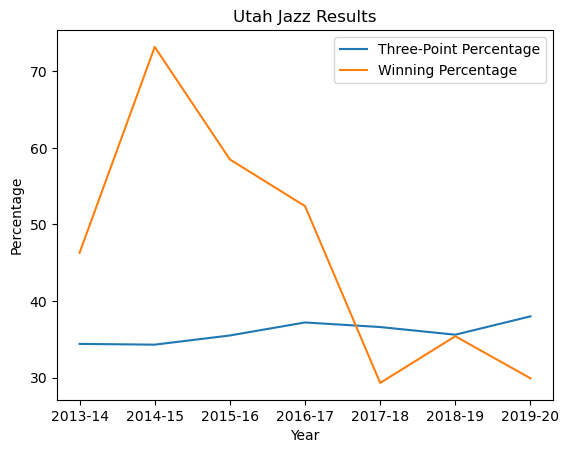

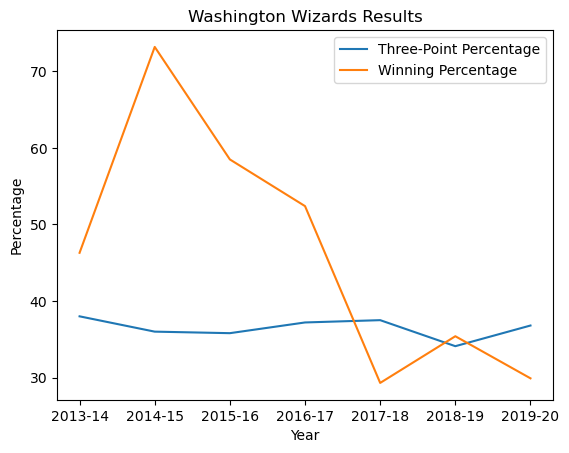

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

group_df = fixed_merge.groupby('Team')
# group_df.head()

for team, group in group_df:

    fig, ax = plt.subplots()


    ax.plot(group['Year'], group['Win Pct'], label='Winning Percentage')
    ax.plot(group['Year'], group['3P%'], label='Three-Point Percentage')


    ax.set_title(f'{team} Results')
    ax.set_xlabel('Year')
    ax.set_ylabel('Percentage')


    ax.legend()


    plt.show()

TypeError: 'Text' object is not callable

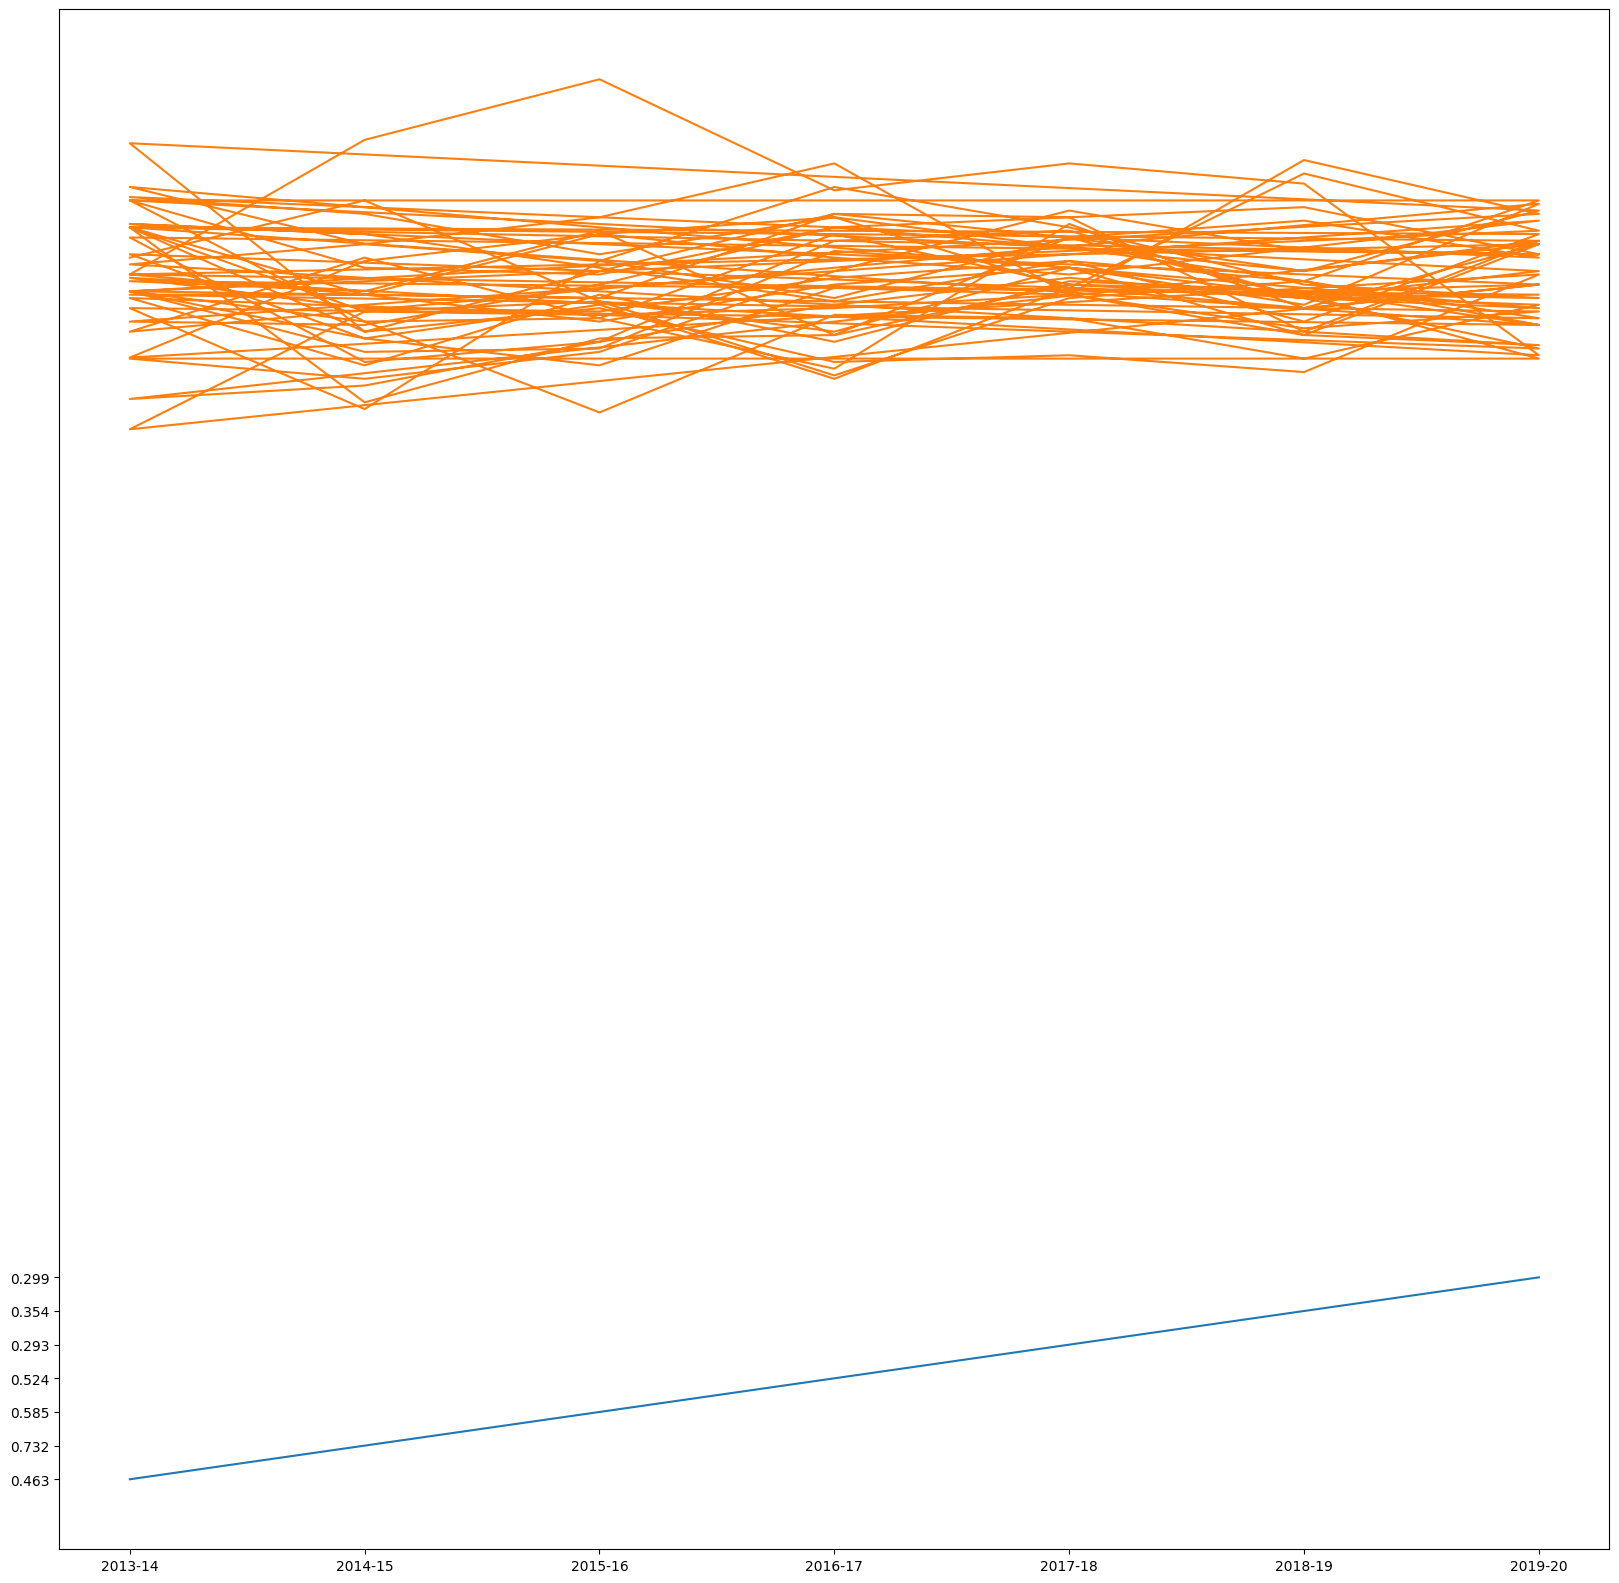

In [ ]:
ig, Axes= plt.subplots(figsize=(20,20))
Axes.plot(fixed_merge['Year'], fixed_merge['Win Pct'], label='Winning Percentage')
Axes.plot(fixed_merge['Year'], fixed_merge['3P%'], label='Three-Point Percentage')


Axes.title('Team Performance')
Axes.xlabel('Year')
Axes.ylabel('Percentage')

Axes.set_xlim(2013-14,2019-20)
plt.legend()


plt.show()

Text(0.5, 1.0, 'NBA Pct')

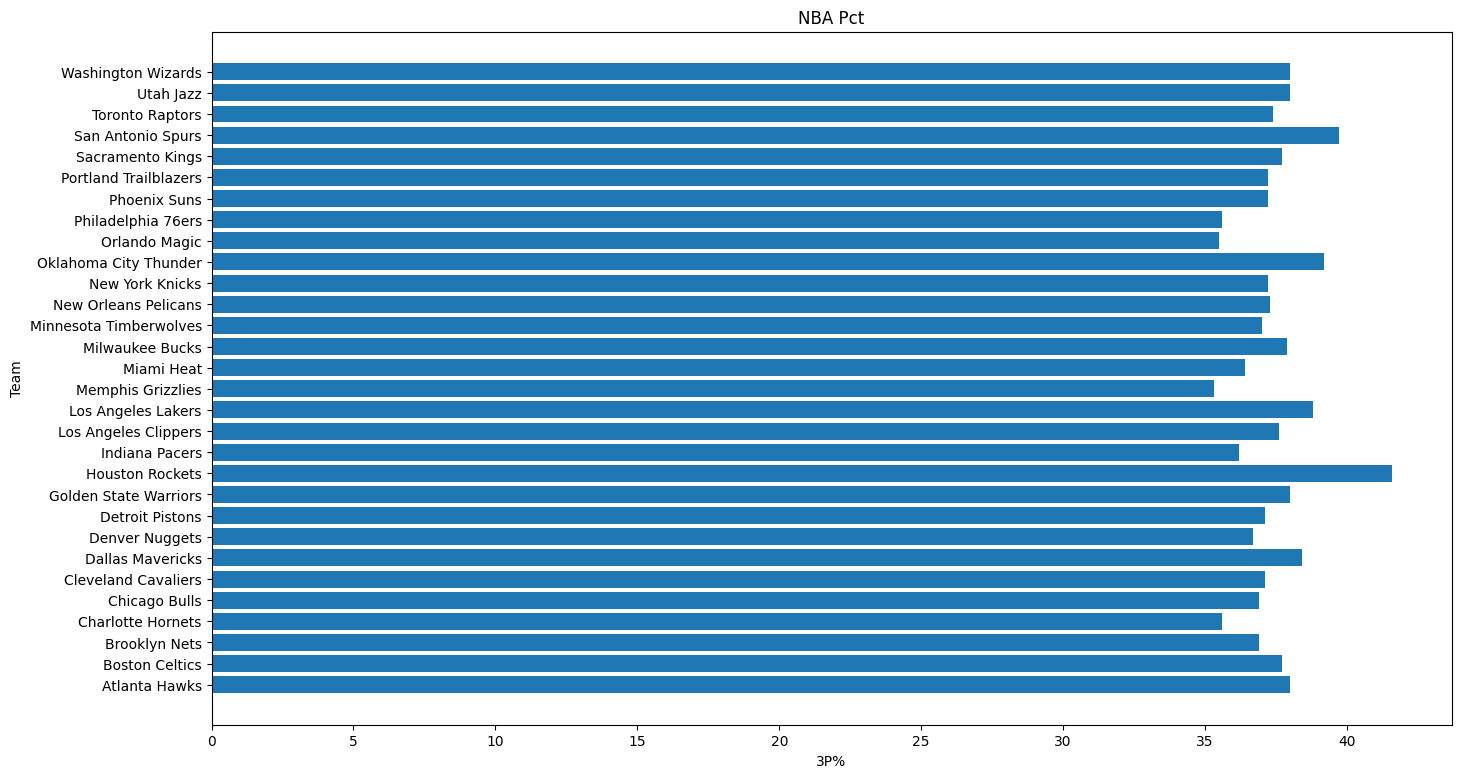

In [ ]:
import matplotlib.pyplot as plt
plt.plot(fixed_merge['Year'],fixed_merge['3P%'])
plt.plot(fixed_merge['Year'],fixed_merge['Team'])
plt.xlabel('Year')
plt.ylabel('3P%')

plt.title("NBA Pct")

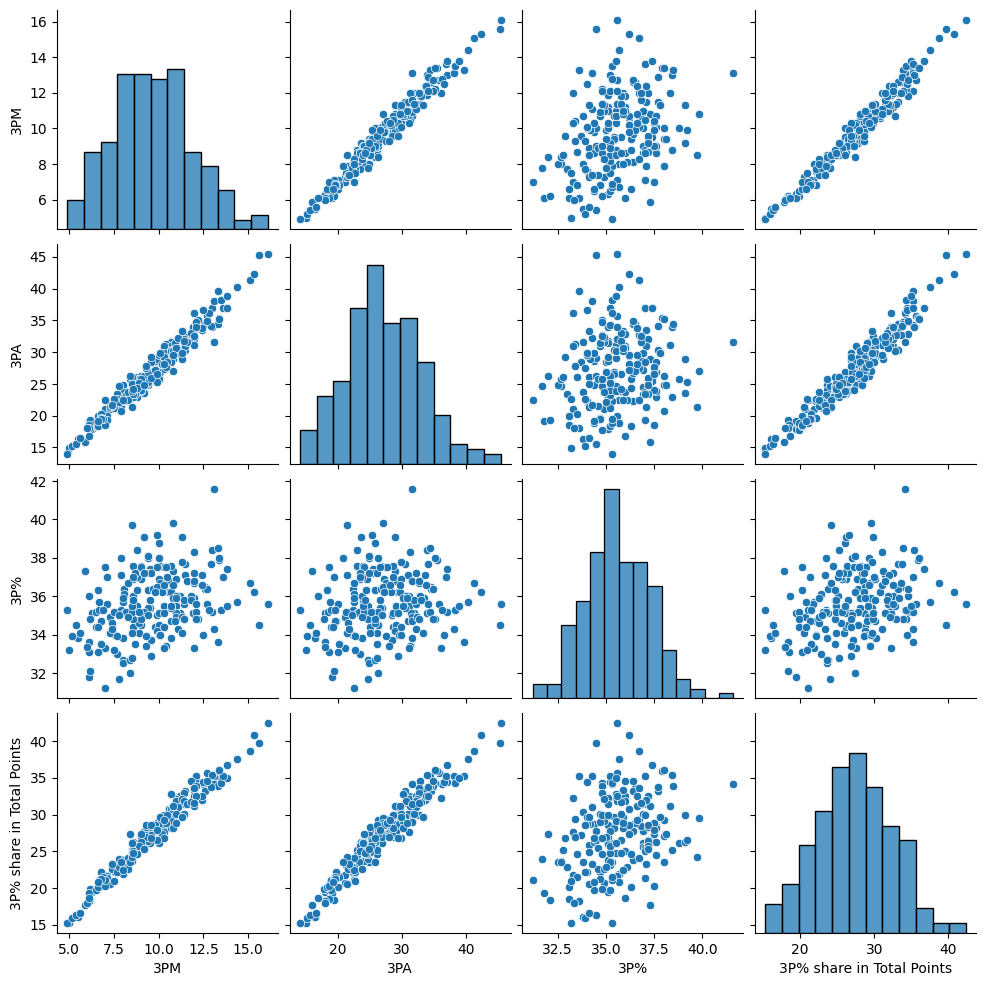

In [ ]:
import seaborn as sns
sns.pairplot(fixed_merge)